# Giới thiệu về hồi quy Ridge

Bài này hướng dẫn các bạn thực hiện hồi quy Ridge ((Ridge Regression) một cách chi tiết với Python. Nội dung của bài thuộc chương 6 cuốn An Introduction to Statistical Learning của James et al. (2013). 

Trong bài này chúng ta sử dụng bộ số liệu boston thuộc gói mglearn. Để sử dụng bộ dữ liệu này: 


In [26]:
# Load gói và bộ dữ liệu Boston: 
import mglearn
X, y = mglearn.datasets.load_extended_boston()

Kế đến chúng ta thực hiện phân chia dữ liệu trong đó 80% dữ liệu được sử dụng để dựng mô hình, 20% còn lại để kiểm định chất lượng dự báo của mô hình: 

In [27]:
# Thực hiện phân chia dữ liệu: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2 / 10, random_state = 0)

In [28]:
# Thiết lập một dải của alpha cần khảo sát: 
    
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 1, 2, 3, 4, 5, 10, 20, 30, 80, 100]

# Tạo ra hai array trống:     
training_accuracy = []
testing_accuracy = []

# Viết vòng lặp for loop chạy Ridge Regression ứng với 10 giá trị của alpha: 
for i in alpha_list: 
    ridge = Ridge(alpha = i).fit(X_train, y_train)
    # Tính Accuracy (hay R2) cho dữ liệu huấn luyện: 
    training_accuracy.append(ridge.score(X_train, y_train))
    # Tính Accuracy cho dữ liệu kiểm định: 
    testing_accuracy.append(ridge.score(X_test, y_test))

Hình ảnh hóa mức độ chính xác của mô hình khi alpha thay đổi: 

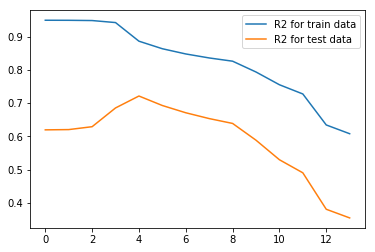

In [29]:
# Gọi các gói cần thiết: 
import matplotlib as plt    
import matplotlib.pyplot as plt

# Vẽ: 
plt.plot(training_accuracy, label = "R2 for train data")
plt.plot(testing_accuracy, label = "R2 for test data")
plt.legend()
plt.show()


In [30]:
testing_accuracy[4]

0.72138051280358906

Kết quả chính xác 72.14% ở trên là trong tình huống với MỘT bộ dữ liệu kiểm định. Để đánh  giá chính xác hơn chất lượng dự báo của  mô hình hồi quy Ridge chúng ta sẽ khảo sát trên 1000 mẫu dữ liệu kiểm định khác nhau: 

In [33]:
testing_accuracy_1000 = []

for k in range(1, 1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 2 / 10,
                                                    random_state = k)
    ridge_001 = Ridge(alpha = 0.01).fit(X_train, y_train)
    testing_accuracy_1000.append(ridge_001.score(X_test, y_test))

Sự biến động của R2 (hay chất lượng dự báo của mô hình) có thể hình ảnh hóa như sau: 

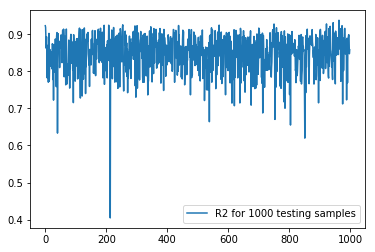

In [34]:
plt.plot(testing_accuracy_1000, label = "R2 for 1000 testing samples")
plt.legend() 
plt.show()

Có thể thấy rằng mức chính xác trong dự báo của mô hình dao động xung quanh giá trị 85%. Chúng ta có thể tính cụ thể R2 trung bình ứng với 1000 bộ dữ liệu kiểm định: 

In [35]:
# R2 trung bình của 1000 cases này: 
import numpy
numpy.mean(testing_accuracy_100)

0.84736375799250985

(Còn tiếp..)  